In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('features_56x56.csv')

In [6]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f3127,f3128,f3129,f3130,f3131,f3132,f3133,f3134,f3135,label
0,0.525490,0.494118,0.509804,0.501961,0.498039,0.529412,0.482353,0.478431,0.450980,0.447059,...,0.560784,0.568627,0.556863,0.564706,0.560784,0.568627,0.556863,0.564706,0.560784,0
1,0.568627,0.568627,0.568627,0.568627,0.564706,0.560784,0.556863,0.552941,0.545098,0.537255,...,0.474510,0.482353,0.490196,0.494118,0.498039,0.501961,0.454902,0.501961,0.454902,0
2,0.560784,0.564706,0.556863,0.568627,0.560784,0.564706,0.556863,0.568627,0.560784,0.564706,...,0.450980,0.478431,0.482353,0.529412,0.498039,0.501961,0.509804,0.494118,0.525490,0
3,0.454902,0.501961,0.454902,0.501961,0.498039,0.494118,0.490196,0.482353,0.474510,0.466667,...,0.545098,0.552941,0.556863,0.560784,0.564706,0.568627,0.568627,0.568627,0.568627,0
4,0.454902,0.454902,0.454902,0.454902,0.454902,0.454902,0.549020,0.537255,0.552941,0.552941,...,0.564706,0.560784,0.564706,0.560784,0.568627,0.560784,0.564706,0.556863,0.568627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.470588,0.529412,0.470588,0.525490,0.521569,0.517647,0.509804,0.501961,0.494118,0.486275,...,0.572549,0.580392,0.588235,0.592157,0.596078,0.600000,0.600000,0.600000,0.600000,1
316,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.572549,0.564706,0.572549,0.576471,...,0.600000,0.592157,0.596078,0.588235,0.600000,0.592157,0.592157,0.588235,0.600000,1
317,0.588235,0.588235,0.588235,0.588235,0.584314,0.580392,0.572549,0.564706,0.560784,0.545098,...,0.521569,0.529412,0.533333,0.541176,0.545098,0.462745,0.549020,0.545098,0.552941,1
318,0.600000,0.588235,0.592157,0.592157,0.600000,0.588235,0.596078,0.592157,0.600000,0.588235,...,0.572549,0.564706,0.572549,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,1


In [8]:
X = df.drop(columns=['label'])
Y = df['label']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [14]:
#Best Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.8867, Test Accuracy: 0.7656

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.61948516, 0.7567022 , 0.88997782, 0.91483051, 0.93427991,
       0.95319568, 0.96517144, 0.97433699, 0.98231778, 0.9836708 ,
       0.98496596, 0.98566137, 0.98629   , 0.98689838, 0.98748449,
       0.98800008, 0.98845128, 0.98886431, 0.98924096, 0.98961283,
       0.98996681, 0.99030864, 0.99063082, 0.99093883, 0.99123348,
       0.99151474, 0.99179165, 0.99206201, 0.99229402, 0.99252246,
       0.99272543, 0.99291624, 0.99309264, 0.99326295, 0.99343123,
       0.99359005, 0.99374718, 0.99389516, 0.99403551, 0.99417491,
       0.99431063, 0.99444276, 0.99457032, 0.99469491, 0.9948159 ,
       0.9949314 , 0.99504395, 0.99514857, 0.99524901, 0.9953456 ,
       0.99544052, 0.99552793, 0.99561329, 0.99569681, 0.99577936,
       0.99585932, 0.9959379 , 0.99601489, 0.99608967, 0.99616346,
       0.99623527, 0.99630636, 0.99637661, 0.9964456 , 0.99651326,
       0.9965791 , 0.99664321, 0.99670685, 0.99676965, 0.99683162,
       0.99689269, 0.99695107, 0.99700892, 0.99706544, 0.99712

In [20]:
pca.explained_variance_ratio_.shape

(256,)

In [22]:
X_train_trf.shape

(256, 256)

In [24]:
X_train_scaled.shape

(256, 3136)

In [26]:
"""Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under
the hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."""

"Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under\nthe hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.61948516, 0.7567022 , 0.88997782, 0.91483051, 0.93427991,
       0.95319568, 0.96517144, 0.97433699, 0.98231778, 0.9836708 ,
       0.98496596, 0.98566137, 0.98629   , 0.98689838, 0.98748449,
       0.98800008, 0.98845128, 0.98886431, 0.98924096, 0.98961283,
       0.98996681, 0.99030864, 0.99063082, 0.99093883, 0.99123348,
       0.99151474, 0.99179165, 0.99206201, 0.99229402, 0.99252246,
       0.99272543, 0.99291624, 0.99309264, 0.99326295, 0.99343123,
       0.99359005, 0.99374718, 0.99389516, 0.99403551, 0.99417491,
       0.99431063, 0.99444276, 0.99457032, 0.99469491, 0.9948159 ,
       0.9949314 , 0.99504395, 0.99514857, 0.99524901, 0.9953456 ,
       0.99544052, 0.99552793, 0.99561329, 0.99569681, 0.99577936,
       0.99585932, 0.9959379 , 0.99601489, 0.99608967, 0.99616346,
       0.99623527, 0.99630636, 0.99637661, 0.9964456 , 0.99651326,
       0.9965791 , 0.99664321, 0.99670685, 0.99676965, 0.99683162,
       0.99689269, 0.99695107, 0.99700892, 0.99706544, 0.99712

In [30]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1

22

In [32]:
#Moving forward with 9 components as it explains over 98% variance of the data

In [34]:
pca = PCA(n_components=9)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [36]:
X_train_trf.shape

(256, 9)

In [38]:
X_test_trf.shape

(64, 9)

XGBoost Model Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.6875
Precision: 0.5769
Recall: 0.6250
F1 Score: 0.6000
ROC AUC: 0.6865


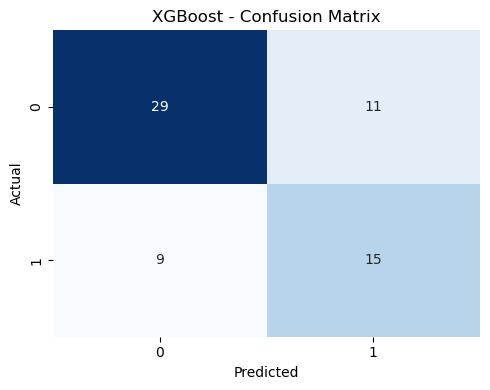

In [40]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)

from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_trf, y_train)

# Predictions
y_train_pred = model.predict(X_train_trf)
y_test_pred = model.predict(X_test_trf)
y_test_prob = model.predict_proba(X_test_trf)[:, 1]

# Evaluation metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("XGBoost Model Evaluation:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 3, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}

Tuned XGBoost Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.7031
Precision: 0.6087
Recall: 0.5833
F1 Score: 0.5957
ROC AUC: 0.7208


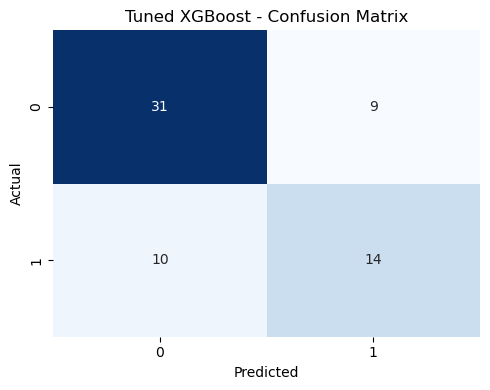

In [42]:
# Import
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2, 3]  # especially useful for imbalanced data
}

# Define XGBoost model
xgb = XGBClassifier(eval_metric='logloss')

# Optimize for recall while also balancing accuracy
scorer = make_scorer(f1_score)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit search
random_search.fit(X_train_trf, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict & Evaluate
y_train_pred = best_xgb.predict(X_train_trf)
y_test_pred = best_xgb.predict(X_test_trf)
y_test_prob = best_xgb.predict_proba(X_test_trf)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("\nTuned XGBoost Evaluation:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tuned XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Final XGBoost Model (With L1 & L2):
Train Accuracy: 1.0000
Test Accuracy: 0.7188
Precision: 0.6667
Recall: 0.5000
F1 Score: 0.5714
ROC AUC: 0.6849


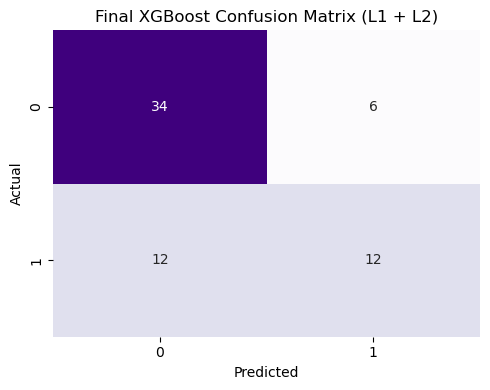

In [74]:
final_model = XGBClassifier(
    n_estimators=260,
    max_depth=7,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=0.8,
    gamma=0.3,
    scale_pos_weight=3,
    reg_alpha=0.001,   # L1 regularization (try 0.1–1.0)
    reg_lambda=0.01,  # L2 regularization (try 0.1–2.0)
    eval_metric='logloss'
)
final_model.fit(X_train_trf, y_train)

# Evaluate
y_train_pred = final_model.predict(X_train_trf)
y_test_pred = final_model.predict(X_test_trf)
y_test_prob = final_model.predict_proba(X_test_trf)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("\nFinal XGBoost Model (With L1 & L2):")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Final XGBoost Confusion Matrix (L1 + L2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.5}
[0]	validation_0-logloss:0.66345
[1]	validation_0-logloss:0.65907
[2]	validation_0-logloss:0.65714
[3]	validation_0-logloss:0.65113
[4]	validation_0-logloss:0.65066
[5]	validation_0-logloss:0.64632
[6]	validation_0-logloss:0.64699
[7]	validation_0-logloss:0.64648
[8]	validation_0-logloss:0.64662
[9]	validation_0-logloss:0.64786
[10]	validation_0-logloss:0.64543
[11]	validation_0-logloss:0.64649
[12]	validation_0-logloss:0.64246
[13]	validation_0-logloss:0.64460
[14]	validation_0-logloss:0.64658
[15]	validation_0-logloss:0.64785
[16]	validation_0-logloss:0.64490
[17]	validation_0-logloss:0.64412
[18]	validation_0-logloss:0.64722
[19]	validation_0-logloss:0.64210
[20]	validation_0-logloss:0.63974
[21]	validation_0-logloss:0.64243
[22]	val

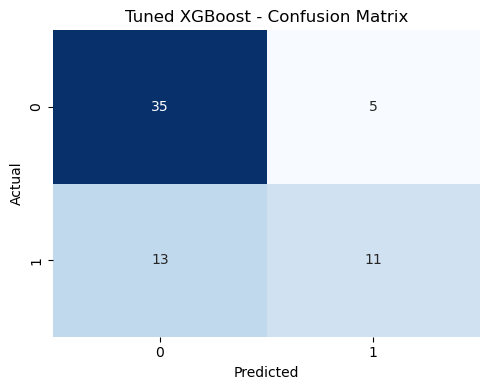

In [108]:
# Imports
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (make_scorer, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter Grid
param_dist = {
    'n_estimators': [50, 75, 100],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'gamma': [0.3, 0.4, 0.5],
    'scale_pos_weight': [1, 2, 3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Scorer for imbalance
scorer = make_scorer(accuracy_score)

# Base XGB model
xgb = XGBClassifier(eval_metric='logloss')

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Step 1: Tune
random_search.fit(X_train_trf, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Step 2: Train best model with early stopping
best_xgb = XGBClassifier(
    **best_params,
    eval_metric='logloss',
)

# Step 2.5: Fit the best model with early stopping
best_xgb.fit(
    X_train_trf, y_train,
    eval_set=[(X_test_trf, y_test)],
    verbose=True
)

# Step 3: Evaluate
y_train_pred = best_xgb.predict(X_train_trf)
y_test_pred = best_xgb.predict(X_test_trf)
y_test_prob = best_xgb.predict_proba(X_test_trf)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("\nTuned XGBoost Evaluation with Early Stopping:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tuned XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()